In [70]:
import pandas as pd 

In [2]:
student_info = 'csv_student/StudentsPerformance.csv'

In [3]:
df = pd.read_csv(student_info)
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.columns = (
    df.columns
    .str.strip()        
    .str.lower()        
    .str.replace(' ', '_')  
)
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [23]:
Nan=pd.DataFrame(df.isnull().sum(),columns = ['count']).T
Nan

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,0,0,0,0,0,0,0,0


In [24]:
uniq=pd.DataFrame(df.nunique(),columns = ['Unique']).T
uniq

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
Unique,2,5,6,2,2,81,72,77


In [34]:
uniq_combinations = df[['gender', 'race/ethnicity', ]].drop_duplicates().T
uniq_combinations

,0,1,3,4,7,8,14,29,32,34
gender,female,female,male,male,male,male,female,female,female,male
race/ethnicity,group B,group C,group A,group C,group B,group D,group A,group D,group E,group E


In [36]:
df.columns


Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [37]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [45]:
reading_full = df[df['reading_score'] == 100]['reading_score'].count()
writing_score_full = df[df['writing_score'] == 100]['writing_score'].count()
math_score_full = df[df['math_score'] == 100]['math_score'].count()

schdual = pd.DataFrame({
    'subject': ['reading', 'writing', 'math'],
    'full_score_count': [reading_full, writing_score_full, math_score_full]
})

full_score = schdual.T
full_score

,0,1,2
subject,reading,writing,math
full_score_count,17,14,7


In [55]:
full_score = schdual.T.style.hide(axis="index")
full_score



0,1,2
reading,writing,math
17,14,7


In [56]:
full_score = schdual.T
full_score.columns = full_score.iloc[0]  
full_score = full_score[1:]                
full_score = full_score.reset_index(drop=True)

full_score

subject,reading,writing,math
0,17,14,7


In [61]:
pass_grade = 50

passed = {
    'reading': df[df['reading_score'] >= pass_grade]['reading_score'].count(),
    'writing': df[df['writing_score'] >= pass_grade]['writing_score'].count(),
    'math': df[df['math_score'] >= pass_grade]['math_score'].count()
}

unpassed = {
    'reading': df[df['reading_score'] < pass_grade]['reading_score'].count(),
    'writing': df[df['writing_score'] < pass_grade]['writing_score'].count(),
    'math': df[df['math_score'] < pass_grade]['math_score'].count()
}



count_all = pd.DataFrame({
    'passed': passed,
    'unpassed': unpassed
})

count_all.T

,reading,writing,math
passed,910,886,865
unpassed,90,114,135


In [68]:
import numpy as np

In [72]:
all_score = {

    'pass_reading' : np.where(df['reading_score'] >= pass_grade, 'yes', 'no'),
    'pass_writing' : np.where(df['writing_score'] >= pass_grade, 'yes', 'no'),
    'pass_math' : np.where(df['math_score'] >= pass_grade, 'yes', 'no') 
}
ss = pd.DataFrame(all_score)
ss

,pass_reading,pass_writing,pass_math
0,yes,yes,yes
1,yes,yes,yes
2,yes,yes,yes
3,yes,no,no
4,yes,yes,yes
...,...,...,...
995,yes,yes,yes
996,yes,yes,yes
997,yes,yes,yes
998,yes,yes,yes


In [74]:
pass_grade = 50

# reading
df['pass_reading'] = 'yes'
filt = df['reading_score'] < pass_grade
df.loc[filt, 'pass_reading'] = 'no'

# writing
df['pass_writing'] = 'yes'
filt = df['writing_score'] < pass_grade
df.loc[filt, 'pass_writing'] = 'no'

# math
df['pass_math'] = 'yes'
filt = df['math_score'] < pass_grade
df.loc[filt, 'pass_math'] = 'no'

df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,pass_reading,pass_writing,pass_math
0,female,group B,bachelor's degree,standard,none,72,72,74,yes,yes,yes
1,female,group C,some college,standard,completed,69,90,88,yes,yes,yes
2,female,group B,master's degree,standard,none,90,95,93,yes,yes,yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,yes,no,no
4,male,group C,some college,standard,none,76,78,75,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,yes,yes,yes
996,male,group C,high school,free/reduced,none,62,55,55,yes,yes,yes
997,female,group C,high school,free/reduced,completed,59,71,65,yes,yes,yes
998,female,group D,some college,standard,completed,68,78,77,yes,yes,yes


In [84]:
new_col=df[['parental_level_of_education', 'pass_reading', 'pass_writing', 'pass_math']]
new_col.head(10).style.hide(axis="index")

parental_level_of_education,pass_reading,pass_writing,pass_math
bachelor's degree,yes,yes,yes
some college,yes,yes,yes
master's degree,yes,yes,yes
associate's degree,yes,no,no
some college,yes,yes,yes
associate's degree,yes,yes,yes
some college,yes,yes,yes
some college,no,no,no
high school,yes,yes,yes
high school,yes,yes,no


In [86]:
df['passed_2_or_more'] = (
    (df[['pass_reading', 'pass_writing', 'pass_math']] == 'yes')
    .sum(axis=1)
    >= 2
)

df['passed_2_or_more'] = np.where(df['passed_2_or_more'], 'yes', 'no')
df[['pass_reading', 'pass_writing', 'pass_math', 'passed_2_or_more']].head()


,pass_reading,pass_writing,pass_math,passed_2_or_more
0,yes,yes,yes,yes
1,yes,yes,yes,yes
2,yes,yes,yes,yes
3,yes,no,no,no
4,yes,yes,yes,yes


In [88]:
def color_no(val):
    if val == 'no':
        return 'color: red; font-weight: bold'
    else:
        return 'color: green'




In [93]:
df[['pass_reading', 'pass_writing', 'pass_math', 'passed_2_or_more']] \
    .style.map(color_no, subset=['passed_2_or_more'])



,pass_reading,pass_writing,pass_math,passed_2_or_more
0,yes,yes,yes,yes
1,yes,yes,yes,yes
2,yes,yes,yes,yes
3,yes,no,no,no
4,yes,yes,yes,yes
5,yes,yes,yes,yes
6,yes,yes,yes,yes
7,no,no,no,no
8,yes,yes,yes,yes
9,yes,yes,no,yes


In [94]:
plot_df = df.melt(
    value_vars=['pass_reading', 'pass_writing', 'pass_math'],
    var_name='subject',
    value_name='result'
)


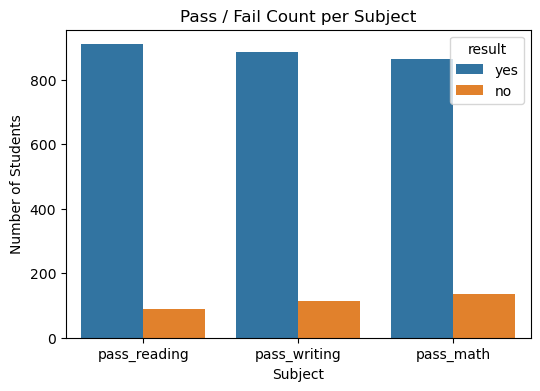

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

sns.countplot(
    data=plot_df,
    x='subject',
    hue='result'
)

plt.title('Pass / Fail Count per Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Students')
plt.show()


NameError: name 'subjects_df' is not defined

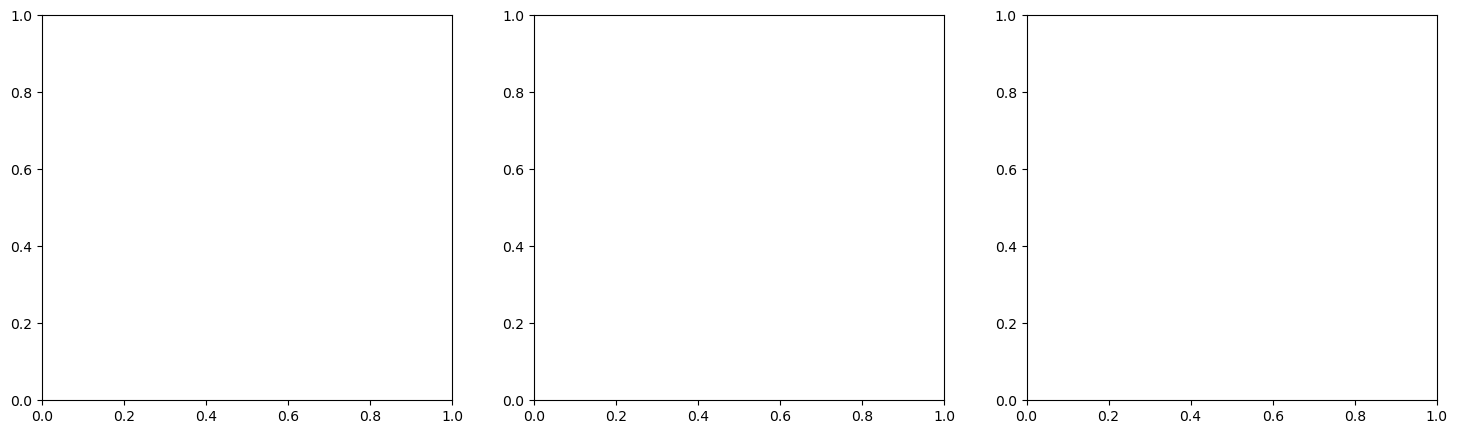

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(
    data=subjects_df,
    x="subject",
    hue="status",
    ax=axes[0]
)

axes[0].set_title("Pass / Fail per Subject")
axes[0].set_xlabel("Subject")
axes[0].set_ylabel("Count")
sns.histplot(
    data=subjects_df,
    x="score",
    hue="subject",
    bins=10,
    kde=True,
    ax=axes[1]
)

axes[1].set_title("Score Distribution")
axes[1].set_xlabel("Score")
axes[1].set_ylabel("Frequency")
